In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.isna().sum()

Tanggal                   0
Bawang Merah            104
Bawang Putih            104
Cabai Merah Keriting    104
Cabai Rawit Merah       104
Daging Sapi             104
Daging Ayam             104
Telur Ayam              104
Beras                   104
Minyak Goreng           104
dtype: int64

In [4]:
df.tail()

,Tanggal,Bawang Merah,Bawang Putih,Cabai Merah Keriting,Cabai Rawit Merah,Daging Sapi,Daging Ayam,Telur Ayam,Beras,Minyak Goreng
1150,2024-02-25,31370.0,36410.0,78630.0,72000.0,134110.0,37540.0,29320.0,16490.0,15520.0
1151,2024-02-26,31380.0,35690.0,81610.0,62520.0,132210.0,36940.0,29760.0,16320.0,15600.0
1152,2024-02-27,31050.0,35330.0,78770.0,73430.0,133790.0,37500.0,29600.0,16560.0,15670.0
1153,2024-02-28,29990.0,35840.0,77050.0,71970.0,133410.0,36780.0,29670.0,16360.0,15720.0
1154,2024-02-29,29920.0,36060.0,72790.0,69720.0,132590.0,37380.0,30530.0,16710.0,15600.0


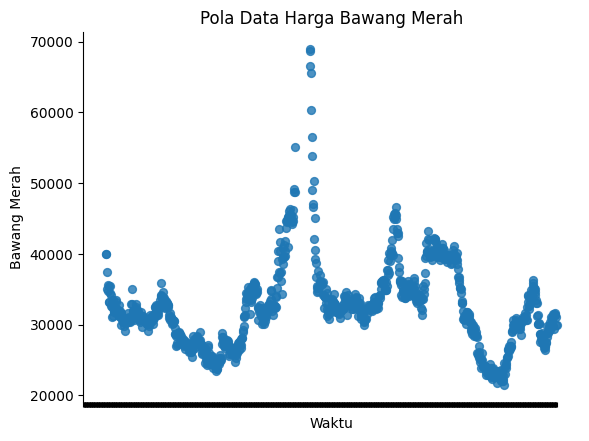

In [5]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Bawang Merah", kind='scatter', x='Tanggal', y='Bawang Merah', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

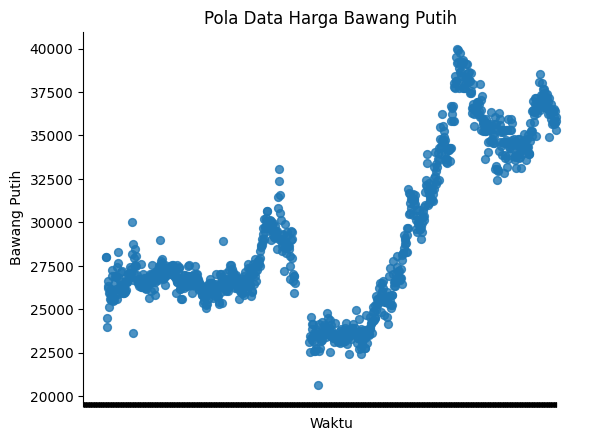

In [6]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Bawang Putih", kind='scatter', x='Tanggal', y='Bawang Putih', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

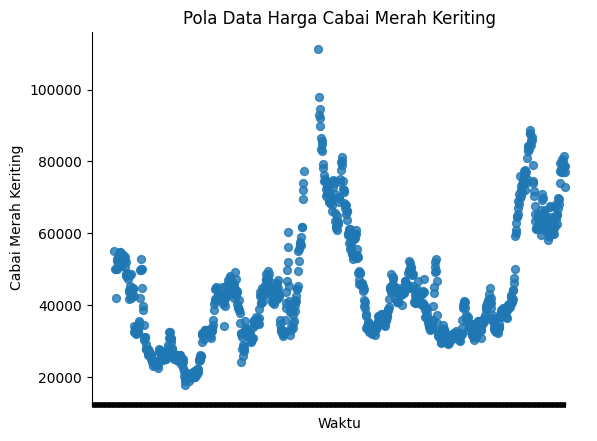

In [7]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Cabai Merah Keriting", kind='scatter', x='Tanggal', y='Cabai Merah Keriting', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

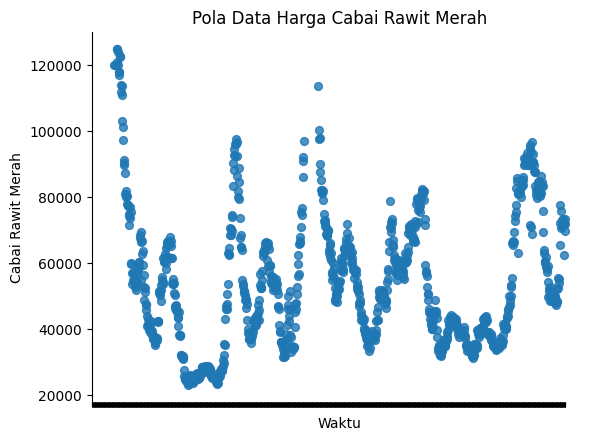

In [8]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Cabai Rawit Merah", kind='scatter', x='Tanggal', y='Cabai Rawit Merah', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

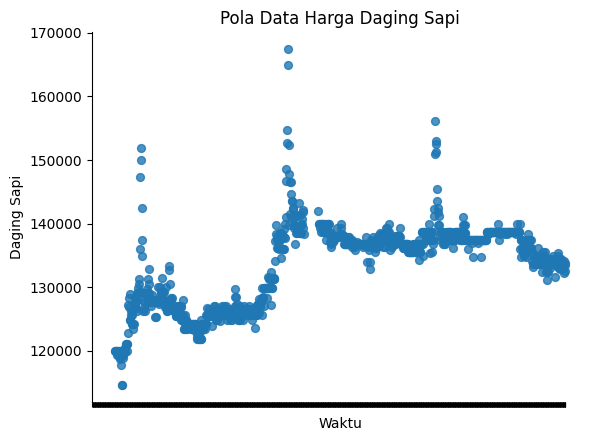

In [9]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Daging Sapi", kind='scatter', x='Tanggal', y='Daging Sapi', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

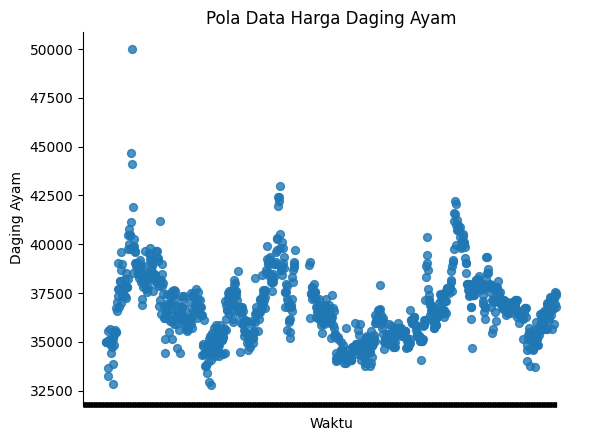

In [10]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Daging Ayam", kind='scatter', x='Tanggal', y='Daging Ayam', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

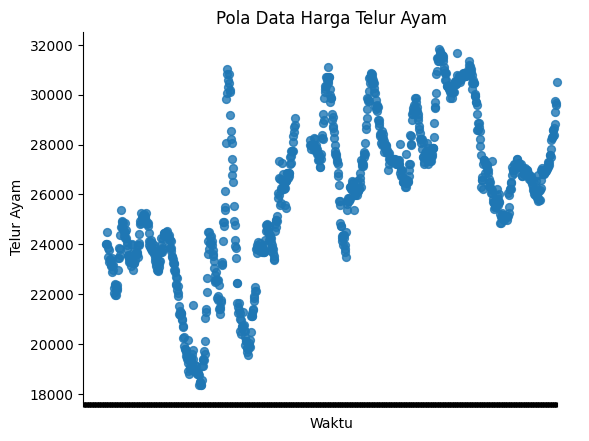

In [11]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Telur Ayam", kind='scatter', x='Tanggal', y='Telur Ayam', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

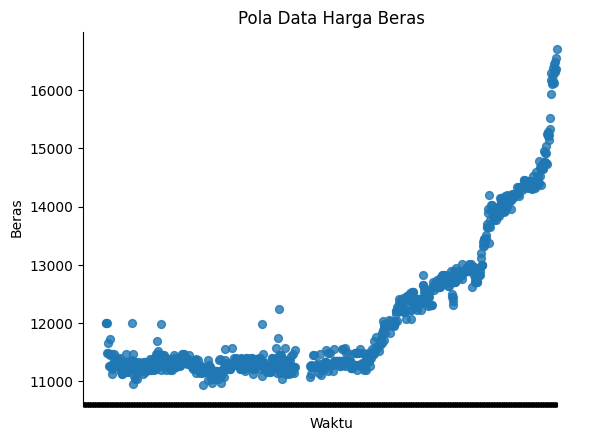

In [12]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Beras", kind='scatter', x='Tanggal', y='Beras', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

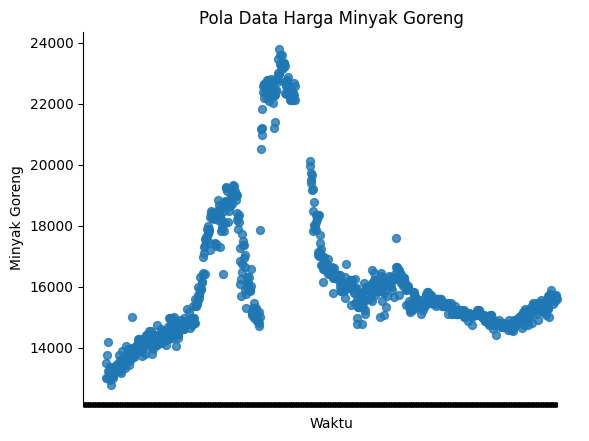

In [13]:
from matplotlib import pyplot as plt
scatter = df.plot(title="Pola Data Harga Minyak Goreng", kind='scatter', x='Tanggal', y='Minyak Goreng', s=32, alpha=.8)
scatter.set_xticklabels([])
scatter.set_xlabel('Waktu')
plt.gca().spines[['top', 'right', 'bottom',]].set_visible(False)

In [ ]:
# # Menghitung batas atas dan bawah untuk setiap fitur

# maximum = {}
# minimum = {}

# def calculateMaxMin(data):
#   for i in range(1, df.shape[1]):
#     Q1 = (data.iloc[:,i]).quantile(0.25)
#     Q3 = (data.iloc[:,i]).quantile(0.75)
#     IQR = Q3 - Q1

#     maximum[data.iloc[:,i].name] = Q3 + (1.5*IQR)
#     minimum[data.iloc[:,i].name] = Q1 - (1.5*IQR)

# calculateMaxMin(df)

In [ ]:
# minimum

{'GKP Tingkat Petani': 2775.0,
 'GKP Tingkat Penggilingan': 2620.0,
 'GKG Tingkat Penggilingan': 3225.0,
 'Beras Premium Penggilingan': 6500.0,
 'Beras Premium Grosir': 8910.0,
 'Beras Premium Eceran': 9110.0}

In [ ]:
# maximum

{'GKP Tingkat Petani': 6335.0,
 'GKP Tingkat Penggilingan': 7180.0,
 'GKG Tingkat Penggilingan': 7665.0,
 'Beras Premium Penggilingan': 13940.0,
 'Beras Premium Grosir': 13230.0,
 'Beras Premium Eceran': 14870.0}

In [ ]:
# def deleteOutliers(data):
#   for i in range(1, df.shape[1]):
#     outliersLowerThan = data.iloc[:,i] < minimum[data.iloc[:,i].name]
#     outliersMoreThan = data.iloc[:,i] > maximum[data.iloc[:,i].name]

#     data.mask(outliersLowerThan, np.nan, inplace=True)
#     data.mask(outliersMoreThan, np.nan, inplace=True)

# deleteOutliers(df)

In [14]:
# Menggunakan metode interpolasi untuk mengganti data bernilai NA

df.interpolate(method='linear', inplace=True, limit_direction='both')

In [15]:
# Melihat jumlah data bernilai kosong setelah metode interpolasi

df.isna().sum()

Tanggal                 0
Bawang Merah            0
Bawang Putih            0
Cabai Merah Keriting    0
Cabai Rawit Merah       0
Daging Sapi             0
Daging Ayam             0
Telur Ayam              0
Beras                   0
Minyak Goreng           0
dtype: int64

In [16]:
df.drop(["Tanggal"], axis=1, inplace=True)

In [ ]:
# test_split = round(len(df)*0.30)
# df_training = df
# df_testing = df[-test_split:]

In [ ]:
# scaler = MinMaxScaler(feature_range=(0,1))
# df_training_scaled = scaler.fit_transform(df_training)
# df_testing_scaled = scaler.transform(df_testing)

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)

In [18]:
test_split = round(len(df)*0.30)
df_training = df_scaled
df_testing = df_scaled[-test_split:]

In [19]:
df_scaled

array([[0.39023364, 0.38023797, 0.39807692, ..., 0.41839763, 0.18370884,
        0.0653951 ],
       [0.39023364, 0.38023797, 0.39807692, ..., 0.41839763, 0.18370884,
        0.0653951 ],
       [0.39023364, 0.38023797, 0.39807692, ..., 0.41839763, 0.18370884,
        0.0653951 ],
       ...,
       [0.20185224, 0.75944128, 0.65202991, ..., 0.83382789, 0.97400347,
        0.26248865],
       [0.17954115, 0.78582514, 0.63365385, ..., 0.83902077, 0.93934142,
        0.26702997],
       [0.17806778, 0.79720641, 0.58814103, ..., 0.90281899, 1.        ,
        0.25613079]])

In [20]:
def createXY(data,n_past):
  dataX = []
  dataY = []
  for i in range(n_past, len(data)):
    dataX.append(data[i - n_past:i])
    dataY.append(data[i,5])
  return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_training,30)
testX,testY=createXY(df_testing,30)

In [22]:
# def createXY(data,n_past):
#   dataX = []
#   dataY = []
#   for i in range(n_past, len(data)):
#     dataX.append(data[i - n_past:i - 7])
#     dataY.append(data[i,5])
#   return np.array(dataX),np.array(dataY)

# trainX,trainY=createXY(df_training_scaled,30)
# testX,testY=createXY(df_testing_scaled,30)

In [23]:
input_shape = trainX[0].shape

In [24]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=input_shape))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, epochs=10, batch_size=32)
# Predict on the test set
predictions = model.predict(testX)

# Evaluate the model
mse = np.mean((predictions - testY) ** 2)
# loss = 100 * np.mean(abs((testY - predictions) / testY))
# loss = np.mean(np.square(np.log(testY + 1) - np.log(predictions + 1)))
print("Loss:", mse)

Epoch 1/10
36/36 [==============================] - 3s 14ms/step - loss: 0.0302
Epoch 2/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0060
Epoch 3/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0036
Epoch 4/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0031
Epoch 5/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 6/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0025
Epoch 7/10
36/36 [==============================] - 1s 15ms/step - loss: 0.0025
Epoch 8/10
36/36 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 9/10
36/36 [==============================] - 1s 15ms/step - loss: 0.0022
Epoch 10/10
10/10 [==============================] - 1s 8ms/step
Loss: 0.01270622183157922


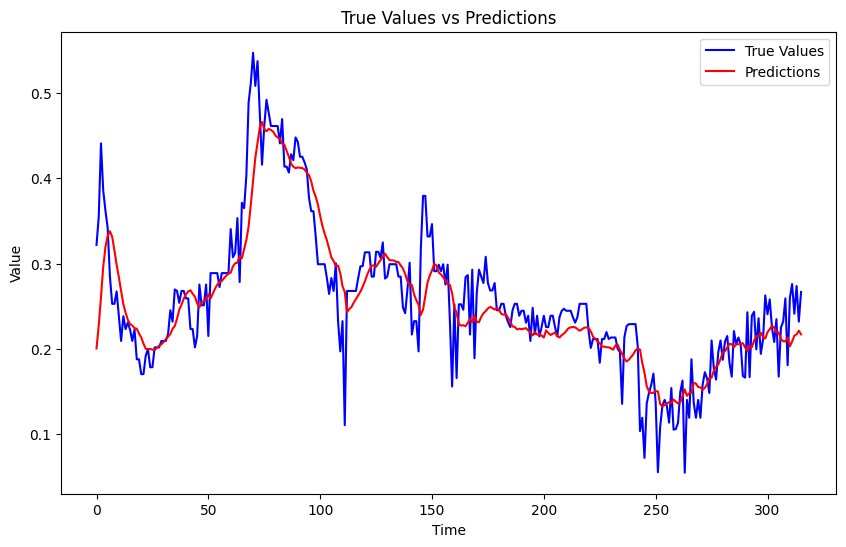

In [25]:
# Plot nilai prediksi dan nilai sebenarnya

plt.figure(figsize=(10, 6))
plt.plot(testY, label='True Values', color='blue')
plt.plot(predictions, label='Predictions', color='red')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('True Values vs Predictions')
plt.legend()

plt.show()

In [26]:
# Build the ANN model
model_ann = Sequential()
model_ann.add(Dense(units=64, activation='relu'))
model_ann.add(Dense(units=32, activation='relu'))  # Hidden layer
model_ann.add(Dense(units=1))  # Output layer

# Compile the ANN model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN model
model_ann.fit(trainX, trainY, epochs=10, batch_size=32)

# Predict on the test set
predictions_ann = model_ann.predict(testX)

# Evaluate the ANN model
mse_ann = np.mean((predictions_ann - testY) ** 2)
print("Loss (ANN):", mse_ann)

Epoch 1/10
36/36 [==============================] - 1s 4ms/step - loss: 0.0266
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 4/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 7/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 8/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 9/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 10/10
10/10 [==============================] - 0s 2ms/step
Loss (ANN): 0.009040905340137517
